<a href="https://colab.research.google.com/github/jaewon-huh/DA_DS_dreamtree/blob/main/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 03 회귀 알고리즘과 모델 규제

## K-최근접 이웃 회귀  
: 샘플에 가장 가까운 샘플 k개 , k개의 샘플 -> 샘플  
 * 분류 - 샘플 클래스는 ? 
 * 회귀-  샘플의 타겟이 임의의 수치 ( k개 샘플 수치들의 평균 -> 샘플)

### 농어 무게 예측 
http://bit.ly/perch_data

In [ ]:
# 농어 길이 무게 
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

Text(0, 0.5, 'weight')

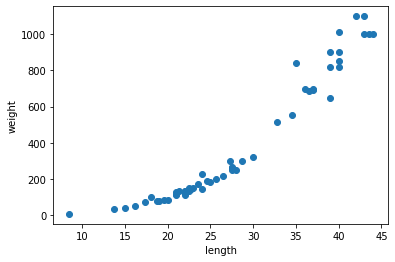

In [ ]:
# 산점도 
import matplotlib.pyplot as plt
plt.scatter(x = perch_length, y = perch_weight)
plt.xlabel('length')
plt.ylabel('weight')

: 농어의 길이와 무게가 비례 관계

In [ ]:
# 학습 데이터 구분 
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight,
                                                                      random_state =42)

* 훈련 세트를 2차원 배열 array로 변환해야함: list -> array

In [ ]:
train_input.shape
# -> (42,1)

(42,)

* reshape(행, 열) : reshape(-1, 1) - 나머지 원소개수 행, 1열  

In [ ]:
# 학습데이터
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


* 최근접 이웃 회귀 알고리즘: KNeighborsRegressor   
 fit -> score : R^2  결정계수

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
# 객체 생성
knr = KNeighborsRegressor()

# 훈련 
knr.fit(train_input,train_target) # Train X-> y

KNeighborsRegressor()

In [ ]:
# 성능 평가 knr.score()
knr.score(test_input, test_target) # test X ->y

0.992809406101064

* 예측 성능 평가 -> metrics 모듈 사용 (acurracy_score ... )  
이번경우에는 mean_absolute_error : 타깃과 예측의 절대값 오차를 평균 

In [ ]:
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측 predict
test_prediction = knr.predict(test_input) # X_test
# 오차 게산 
mae = mean_absolute_error(test_target, test_prediction)
mae

19.157142857142862

: 예측이 평균적으로 19g정도 타깃값과 다르다 

* 훈련세트를 가지고 평가 score(train_input, train_target)

In [ ]:
knr.score(train_input, train_target)

0.9698823289099254

* 과소적합 문제 발생 ,   
보통은 훈련세트 훈련 - 훈련세트 검증 하면 훈련세트 점수가 더 높음   
과대적합 : 훈련세트 점수 >> 테스트 점수 , 훈련 세트에만 잘 맞는 모델   
과소적합 : 훈련세트 점수 < 테스트 점수 or 둘다 low , 모델이 단순해 적절히 훈련되지 않음 

* -> 모델을 더욱 복잡(민감)하게 만듬, k-nearest : 이웃의 개수 줄임( 민감)

In [ ]:
knr.n_neighbors =3 
# 다시 훈련 
knr.fit(train_input, train_target)
knr.score(test_input,test_target)

0.9746459963987609

## 선형회귀

### K-최근접이웃의 한계

In [ ]:
# 이웃 3, k이웃회귀 객체
knr= KNeighborsRegressor(n_neighbors =3)
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
# 길이가 50인 농어의 무게는? 
knr.predict([[50]])

array([1033.33333333])

Problem : 1kg으로 예상했지만 실제로는 무게가 더 나감 (1.5kg)

Text(0, 0.5, 'weight')

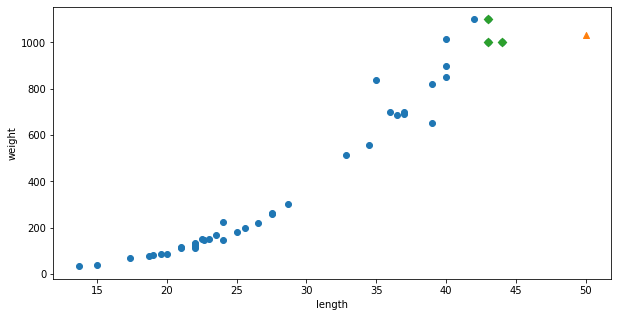

In [ ]:
# 산점도 표시 
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
# 50cm 농어의 이웃 
distances, indexes = knr.kneighbors([[50]])

# 산점도 
plt.scatter(train_input, train_target)
# 50cm 농어 
plt.scatter(50,1033, marker='^')
# 50cm 농어 이웃 샘플
plt.scatter(train_input[indexes], train_target[indexes], marker = "D")

plt.xlabel('length')
plt.ylabel('weight')

: 50cm 의 농어가 이상치임 . 따라서 기존 45cm 농어들 무게의 평균인 1kg으로 평가함

In [ ]:
# 100cm 농어 무게 
knr.predict([[100]])

array([1033.33333333])

Text(0, 0.5, 'weight')

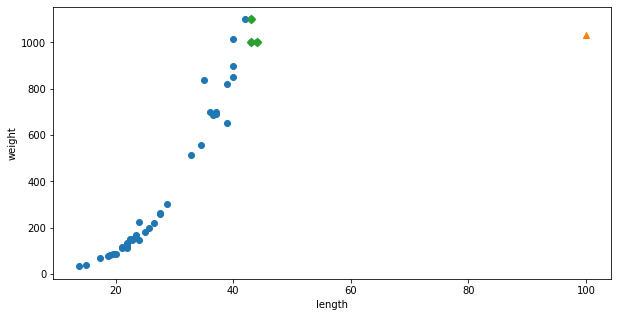

In [ ]:
# 산점도 표시 
plt.figure(figsize=(10,5))
# 100cm 농어의 이웃 
distances, indexes = knr.kneighbors([[100]])

# 산점도 
plt.scatter(train_input, train_target)
# 100cm 농어 
plt.scatter(100,1033, marker='^')
# 100cm 농어 이웃 샘플
plt.scatter(train_input[indexes], train_target[indexes], marker = "D")

plt.xlabel('length')
plt.ylabel('weight')

### 선형 회귀 : 직선을 학습 LinearRegression   
: y = ax + b , coef & intercept

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression() # 객체 

# 훈련 
lr.fit(train_input, train_target)

# 50cm 농어 예측 
lr.predict([[50]])

array([1241.83860323])

In [ ]:
# a와 b 파라미터 lr.coef_ , lr.intercept_
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


y = 39.01x -709.01 을 따름

Text(0, 0.5, 'weight')

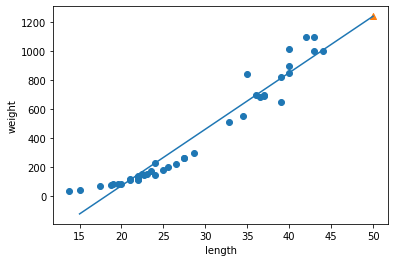

In [ ]:
# 산점도와 회귀선 
plt.scatter(train_input, train_target)

# 농어 길이 15 ~ 50 까지의 방정식 
plt.plot([15,50] , [15*lr.coef_ +lr.intercept_, 50*lr.coef_ +lr.intercept_])

# 50cm 농어 데이터 
plt.scatter(50,1241.8 ,marker ="^")
plt.xlabel('length')
plt.ylabel('weight')

In [ ]:
# score -> R^2 결정계수 확인 
print('훈련세트 :',lr.score(train_input, train_target))
print('테스트 세트 :', lr.score(test_input, test_target))


훈련세트 : 0.939846333997604
테스트 세트 : 0.8247503123313558


: 무게가 0이하인 값도 회귀선에 표시 & 실제 농어 길이,무게 산점도는 곡선형태

### 다항회귀

* 최적의 곡선   
무게 : a * 길이^2 + b* 길이 + c

In [ ]:
# numpy - column_stack()을 활용해 길이 제곱 항을 추가 
import numpy as np
train_poly = np.column_stack((train_input **2 , train_input))
test_poly = np.column_stack((test_input **2 , test_input))

In [ ]:
train_poly.shape, test_poly.shape

((42, 2), (14, 2))

In [ ]:
# 선형 회귀 학습 
lr = LinearRegression()
lr.fit(train_poly, train_target)
# 길이가 50인 농어 다항회귀 예측
lr.predict([[50**2 ,50]])


array([1573.98423528])

단항 회귀 값인 1241 값보다 다항 회귀 값이 더 높은 무게로 예측 

In [ ]:
# coef & intercept
lr.coef_, lr.intercept_

(array([  1.01433211, -21.55792498]), 116.0502107827827)

무게 = 1.01 * 길이^2 - 21.55 * 길이 + 116

* 2차방정식 회귀선 : 짧은 직선을 이어서 곡선처럼 표현

Text(0, 0.5, 'weight')

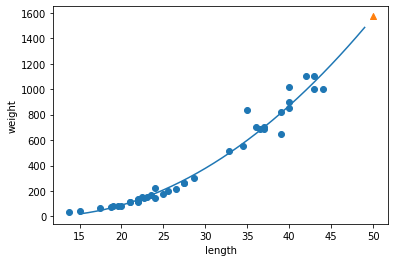

In [ ]:
# 구간별 직선을 위해 정수배열 (길이)
point = np.arange(15,50)

# 산점도 
plt.scatter(train_input, train_target)

# 2차 방정식 그래프 (선)
plt.plot(point, 1.01 * point**2 - 21.55 * point + 116.05)

# 50cm의 농어 
plt.scatter(50 , 1573 , marker= '^')

plt.xlabel('length')
plt.ylabel('weight')

In [ ]:
# score -> R^2 결정계수 확인 
print('훈련세트 :',lr.score(train_poly, train_target))
print('테스트 세트 :', lr.score(test_poly, test_target))


훈련세트 : 0.9706807451768623
테스트 세트 : 0.9775935108325122


: 과소적합 문제가 남아 있는 듯

## 특성 공학과 규제 

* 농어의 길이 , 높이 , 두께 데이터 로드

In [ ]:
# 웹 주소로 데이터를 가져오는 것 가능
import pandas as pd 
df = pd.read_csv('http://bit.ly/perch_csv') 
perch_full = df.to_numpy() # 넘파이 배열로 반환 
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

* 농어의 무게 

In [ ]:
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [ ]:
# 데이터 분할 (훈련 / 테스트)
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, 
                                                                      random_state =42) 

#### 새로운 특성 만들기 : 특성공학  
변환기 transformer : 특성을 만들거나 전처리 위한 클래스 fit() & transform()  
* PolynomialFeatures 클래스를 사용  

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

* fit() 메서드는 새롭게 만들 특성 조합을 찾고 (입력 데이터만 전달),   
transform() 메서드는 실제로 데이터를 변환  
기본적으로 각 특성을 제곱한 항 , 특성끼리 서로 곱한 항 추가    
  +1 (절편* 1) 무게 = a* 길이 +b* 높이 +c * 두께 + d *1

In [ ]:
poly = PolynomialFeatures() # 객체 생성
poly.fit([[2,3]]) # 2와 3 특성 2개로 이루어진 샘플 적용 
poly.transform([[2,3]]) # 변환 

array([[1., 2., 3., 4., 6., 9.]])

In [ ]:
# 절편 특성은 제거 
poly = PolynomialFeatures(include_bias = False)
poly.fit([[2,3]]) # 2와 3 특성 2개로 이루어진 샘플 적용 
poly.transform([[2,3]]) # 변환

array([[2., 3., 4., 6., 9.]])

In [ ]:
# 특성 공학 적용 
poly = PolynomialFeatures(include_bias = False)
# fit
poly.fit(train_input)
# transform
train_poly = poly.transform(train_input)
train_poly.shape

(42, 9)

: 3 개였던 특성이 9개로 

In [ ]:
# 각각의 특성 조합 확인 get_feautres_names()
poly.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [ ]:
# 테스트 세트 변환 
test_poly = poly.transform(test_input)

#### 다중 회귀 모델 훈련하기 : 선형 회귀모델하고 똑같은 방식

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
# 훈련 세트를 평가
lr.score(train_poly, train_target)

0.9903183436982124

In [ ]:
# 테스트 세트 평가 
lr.score(test_poly, test_target)

0.9714559911594134

: 과소적합 문제는 해결 (훈련세트 평가 > 테스트 세트 평가)

* 특성을 더 많이 추가 : PolynomialFeatures(degree = n) , 고차항의 최대 차수 지정 

In [ ]:
# 객체 생성 
poly =PolynomialFeatures(degree= 5, include_bias= False) # 5제곱 특성
# fit
poly.fit(train_input)
# transform
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
train_poly.shape

(42, 55)

: 열 특성이 55개

In [ ]:
# 선형 회귀 모델 훈련 
lr.fit(train_poly, train_target)
# 점수 훈련세트 
lr.score(train_poly, train_target)

0.9999999999991097

In [ ]:
# 테스트 셋 점수 
lr.score(test_poly, test_target)

-144.40579242684848

: 특성의 개수를 크게 늘리면 선형 모델 강력 ,  
but 훈련세트에 너무 과대적합 -> 테스트셋 bad  
--> 규제 !

#### 규제 regularization :    
머신러닝 모델이 훈련세트를 너무 과도하게 학습하지못하도록 , 과대적합 방지   
선형 회귀 모델 경우 특성에 곱해지는 계수의 크기를 작게 함 

* 먼저 특성의 스케일 정규화 StandardScaler() 클래스 사용 

In [ ]:
from sklearn.preprocessing import StandardScaler 
# 객체 생성
ss = StandardScaler()
# 학습 
ss.fit(train_poly)
# 변환 : 훈련세트로 학습한 변환기를 사용해 테스트 세트까지 변환 
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

표준 점수로 변환한 train_scaled 와 test_scaled 준비 완료 

##### 릿지회귀 :  
'계수를 제곱한 값' 을 기준으로 규제 적용  , *sklearn*.linear_model 패키지 안 Ridge

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
# 훈련
ridge.fit(train_scaled, train_target) 
# 학습 데이터셋 평가 
ridge.score(train_scaled , train_target)

0.9896101671037343

In [ ]:
# 테스트 셋 점수 
ridge.score(test_scaled, test_target)

0.9790693977615397

: 테스트 셋 점수가 정상으로 돌아옴 , 과대적합도 x 

* 릿지와 라쏘 모델 규제의 양 조절 :  
alpha 매개변수 크면 규제 강, 계수 값을 더 줄여 더 과소적합 하도록,  
alpha 작으면 계수 값 조금 줄임

* 적절한 alpha 값 : alpha 값에 대한 R^2 값의 그래프 ,   
학습 데이터와 테스트 데이터의 점수가 가장 가까운 지점이 최적 alpha

In [ ]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

In [ ]:
# 알파 값 조절 
alpha_list = [0.001 , 0.01, 0.1 ,1  ,10 , 100]
for alpha in alpha_list : 
  # 릿지 모델 
  ridge = Ridge(alpha = alpha)
  # 훈련 
  ridge.fit(train_scaled, train_target)
  # 점수를 train_score / test_score 리스트에 입력
  train_score.append(ridge.score(train_scaled, train_target)) # 학습
  test_score.append(ridge.score(test_scaled, test_target)) # 테스트 

Text(0, 0.5, 'R^2')

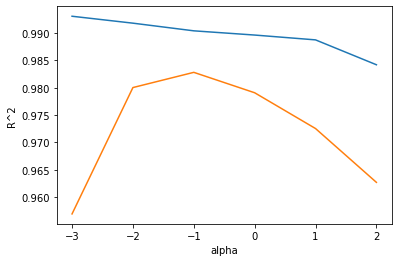

In [ ]:
# 그래프 그리기 
# 1 alpha 리스트 값이 10배씩 차이남 간격 너무 큼 -> 간격 조절 log함수 사용 
plt.plot(np.log10(alpha_list), train_score) # x : alpha , y : train_score 
plt.plot(np.log10(alpha_list), test_score) 

plt.xlabel('alpha')
plt.ylabel('R^2')

: 왼쪽-  학습 셋과 테스트 셋의 점수 차이가 너무 큼 (과대적합) / 오른쪽 - 모두 낮음( 과소 적합) ,  
 최적값 -1 : alpha 0.1 

In [ ]:
# 최종 모델 훈련 및 평가 
ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled, train_target)
print('학습:', ridge.score(train_scaled, train_target))
print('테스트:', ridge.score(test_scaled, test_target))

학습: 0.9903815817570366
테스트: 0.9827976465386926


: 학습/ 테스트 셋 점수 모두 높아지고 과대 적합 문제도 x 

##### 라쏘회귀 :  
'계수의 절대값' 을 기준으로 규제 적용  , *sklearn*.linear_model 패키지 안 Lasso

In [ ]:
from sklearn.linear_model import Lasso 
lasso = Lasso()
lasso.fit(train_scaled, train_target)
# 점수 
print('학습:', lasso.score(train_scaled, train_target))
print('테스트:', lasso.score(test_scaled, test_target))

학습: 0.989789897208096
테스트: 0.9800593698421883


In [ ]:
# alpha 값 조절
train_score = []
test_score = []
alpha_list = [0.001 , 0.01, 0.1 ,1  ,10 , 100]
for alpha in alpha_list : 
  # 라쏘 모델 
  lasso = Lasso(alpha = alpha , max_iter = 10000)
  # 훈련 
  lasso.fit(train_scaled, train_target)
  # 점수를 train_score / test_score 리스트에 입력
  train_score.append(lasso.score(train_scaled, train_target)) # 학습
  test_score.append(lasso.score(test_scaled, test_target)) # 테스트 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Text(0, 0.5, 'R^2')

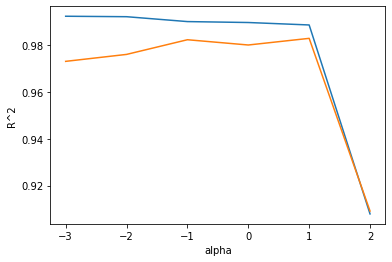

In [ ]:
# 그래프 그리기 
# 1 alpha 리스트 값이 10배씩 차이남 간격 너무 큼 -> 간격 조절 log함수 사용 
plt.plot(np.log10(alpha_list), train_score) # x : alpha , y : train_score 
plt.plot(np.log10(alpha_list), test_score) 

plt.xlabel('alpha')
plt.ylabel('R^2')

: 최적 알파값 1 : 10

In [ ]:
lasso = Lasso(alpha =10 )
lasso.fit(train_scaled, train_target)
print('학습:', lasso.score(train_scaled, train_target))
print('테스트:', lasso.score(test_scaled, test_target))

학습: 0.9888067471131867
테스트: 0.9824470598706695


* lasso 모델은 계수 값을 아예 0으로 만들 수 있다 

In [ ]:
# 계수가 0인 것 확인 
np.sum(lasso.coef_ == 0)

40

: 55개 특성 중 40개 특성의 계수 0 , 사용 특성 15개 (유용한 특성)